In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
data_dir = r"C:\Users\moren\cancer_detecter\HAMDataset\Classes"

# Parameters
img_height, img_width = 128, 128
batch_size = 32

# Load and preprocess images
def load_images(data_dir, img_height, img_width):
    images = []
    labels = []
    classes = os.listdir(data_dir)
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
                img = tf.keras.preprocessing.image.img_to_array(img)
                img = img / 255.0
                images.append(img)
                labels.append(class_name)
    return np.array(images), np.array(labels)

images, labels = load_images(data_dir, img_height, img_width)

# Encode labels
label_mapping = {label: idx for idx, label in enumerate(np.unique(labels))}
labels_encoded = np.array([label_mapping[label] for label in labels])
labels_categorical = to_categorical(labels_encoded)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
num_classes = len(np.unique(labels))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

D:\anaconda-install\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

history = model.fit(train_generator,
                    epochs=100,
                    validation_data=val_generator,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100


D:\anaconda-install\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.6399 - loss: 1.1546
Epoch 1: val_loss improved from inf to 0.98151, saving model to best_model.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 125s 474ms/step - accuracy: 0.6400 - loss: 1.1541 - val_accuracy: 0.6585 - val_loss: 0.9815
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.6718 - loss: 0.9646
Epoch 2: val_loss improved from 0.98151 to 0.91370, saving model to best_model.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 169s 664ms/step - accuracy: 0.6718 - loss: 0.9646 - val_accuracy: 0.6500 - val_loss: 0.9137
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.6660 - loss: 0.9177
Epoch 3: val_loss improved from 0.91370 to 0.91287, saving model to best_model.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 159s 622ms/step - accuracy: 0.6660 - loss: 0.9177 - val_accuracy: 0.6620 - val_loss: 0.9129
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.6740 - loss: 0.8808
Epoch 4: val_loss improved from 0.91287 to

251/251 ━━━━━━━━━━━━━━━━━━━━ 210s 823ms/step - accuracy: 0.7404 - loss: 0.7089 - val_accuracy: 0.7394 - val_loss: 0.6790
Epoch 25/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.7424 - loss: 0.7000
Epoch 25: val_loss did not improve from 0.66608
251/251 ━━━━━━━━━━━━━━━━━━━━ 200s 785ms/step - accuracy: 0.7424 - loss: 0.6999 - val_accuracy: 0.7324 - val_loss: 0.6912
Epoch 26/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.7465 - loss: 0.6992
Epoch 26: val_loss did not improve from 0.66608
251/251 ━━━━━━━━━━━━━━━━━━━━ 197s 774ms/step - accuracy: 0.7465 - loss: 0.6992 - val_accuracy: 0.7474 - val_loss: 0.6692
Epoch 27/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - accuracy: 0.7376 - loss: 0.7041
Epoch 27: val_loss improved from 0.66608 to 0.64681, saving model to best_model.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 210s 825ms/step - accuracy: 0.7376 - loss: 0.7041 - val_accuracy: 0.7504 - val_loss: 0.6468
Epoch 28/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accura

In [7]:
model.load_weights('best_model.keras')

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - accuracy: 0.7695 - loss: 0.5998
Validation Accuracy: 75.04%


In [25]:
def predict_image(image_path, model, label_mapping, img_height, img_width):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0
    predictions = model.predict(img)
    predicted_class_idx = np.argmax(predictions)
    predicted_class_label = list(label_mapping.keys())[list(label_mapping.values()).index(predicted_class_idx)]
    confidence = predictions[0][predicted_class_idx] * 100
    return predicted_class_label, confidence

# Example usage
image_path = r"C:\Users\moren\cancer_detecter\HAMDataset\Classes\p5.jpeg"
predicted_class, confidence = predict_image(image_path, model, label_mapping, img_height, img_width)
print(f"Predicted Class: {predicted_class} with {confidence:.2f}% confidence")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: mel with 67.70% confidence


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,827,223 (148.11 MB)

 Trainable params: 12,942,407 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,884,816 (98.74 MB)

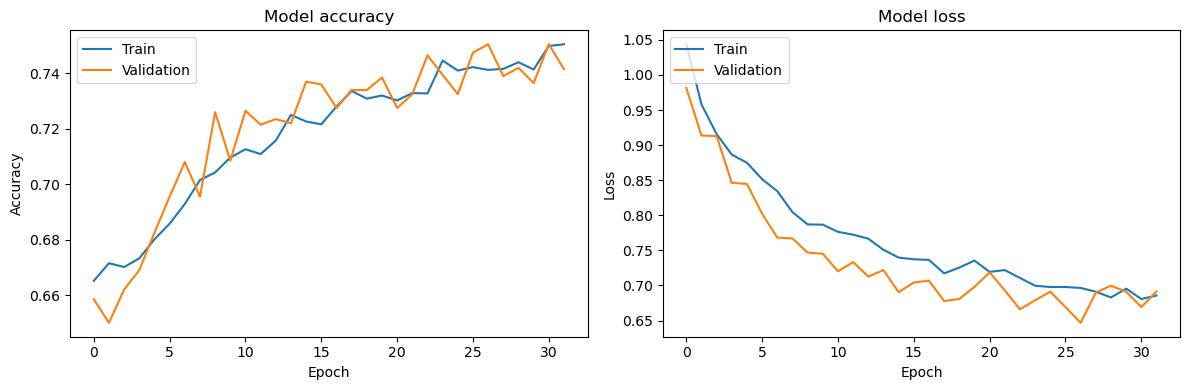

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step


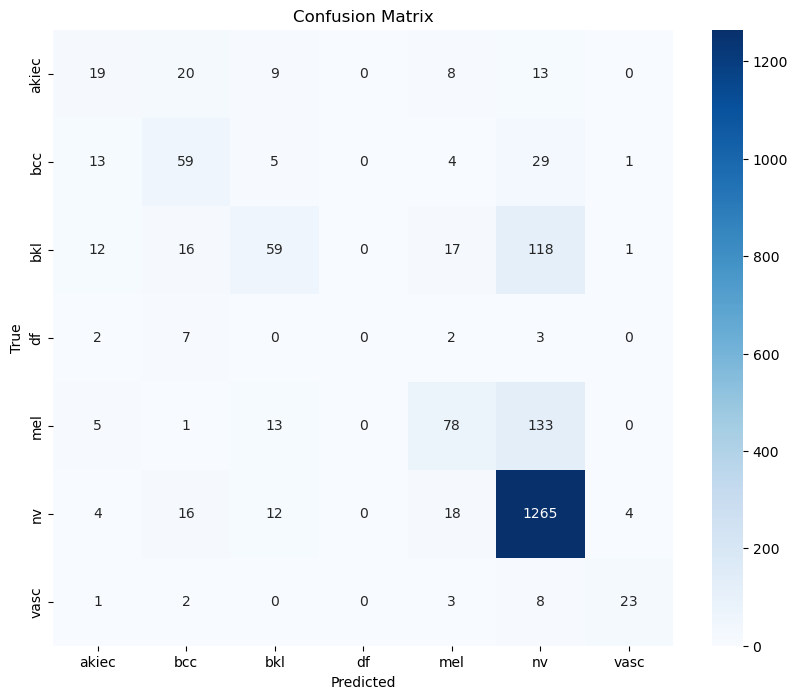

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get true and predicted labels
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Confusion matrix
conf_mat = confusion_matrix(y_val_true, y_val_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.metrics import classification_report

# Classification report
class_report = classification_report(y_val_true, y_val_pred_classes, target_names=label_mapping.keys())
print(class_report)

              precision    recall  f1-score   support

       akiec       0.34      0.28      0.30        69
         bcc       0.49      0.53      0.51       111
         bkl       0.60      0.26      0.37       223
          df       0.00      0.00      0.00        14
         mel       0.60      0.34      0.43       230
          nv       0.81      0.96      0.88      1319
        vasc       0.79      0.62      0.70        37

    accuracy                           0.75      2003
   macro avg       0.52      0.43      0.46      2003
weighted avg       0.72      0.75      0.72      2003



D:\anaconda-install\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda-install\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda-install\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


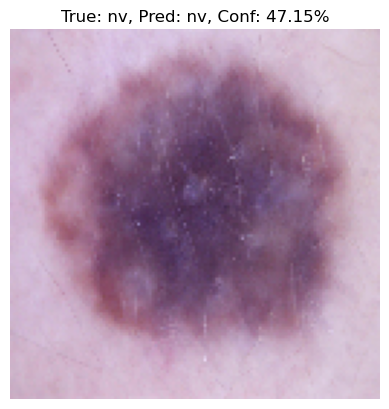

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


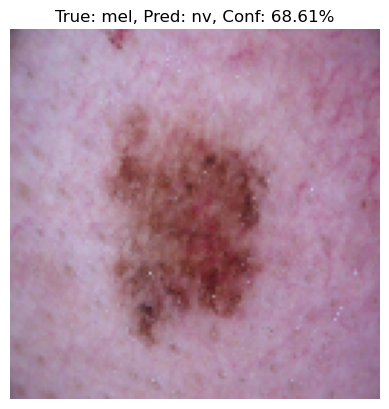

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


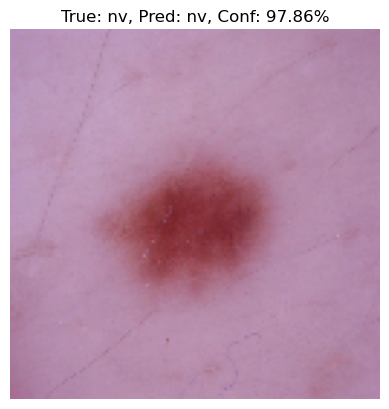

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


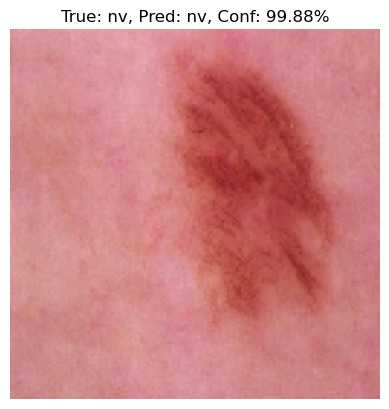

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


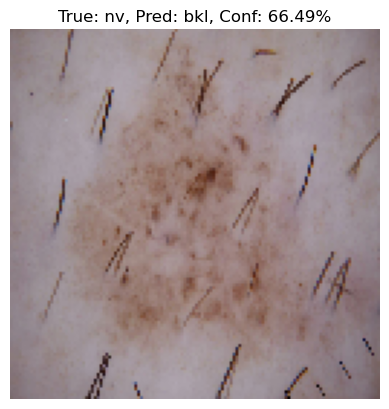

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


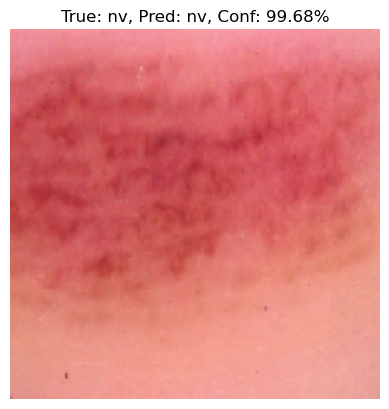

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


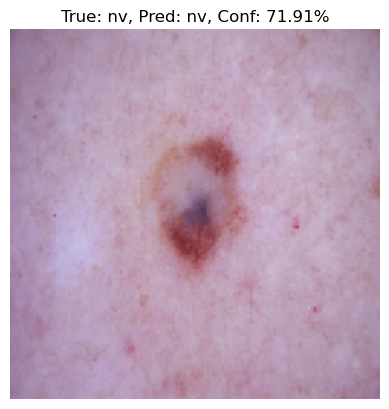

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


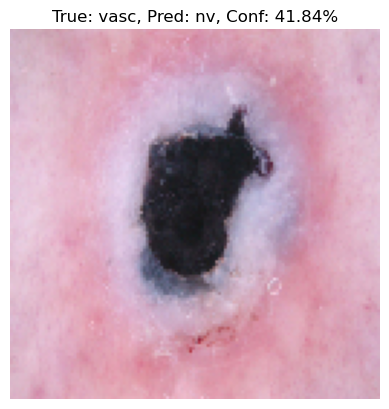

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


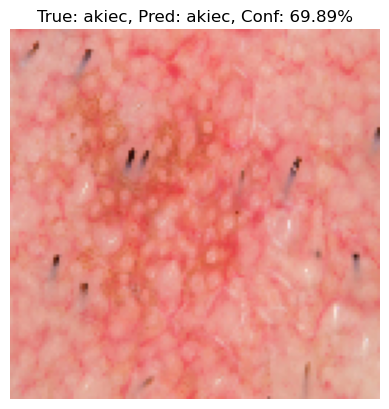

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


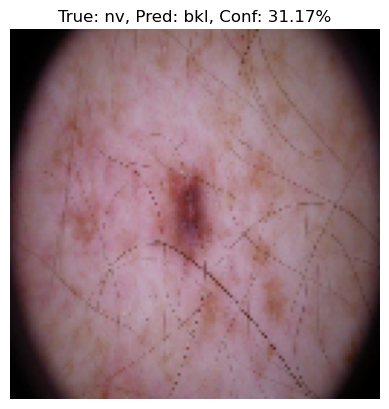

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


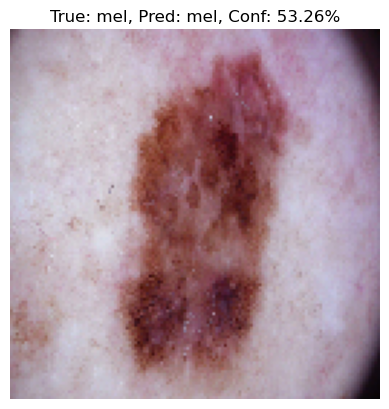

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


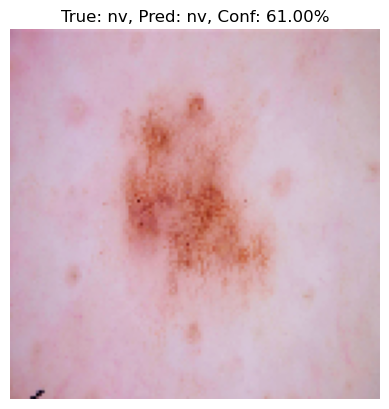

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


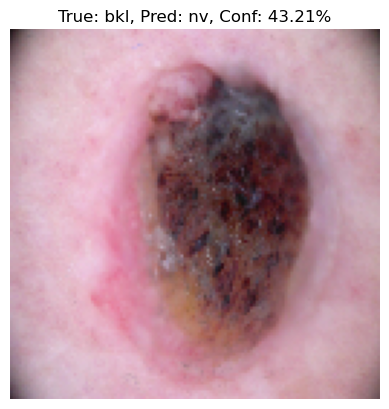

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


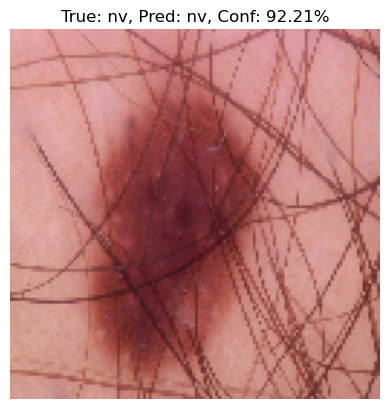

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


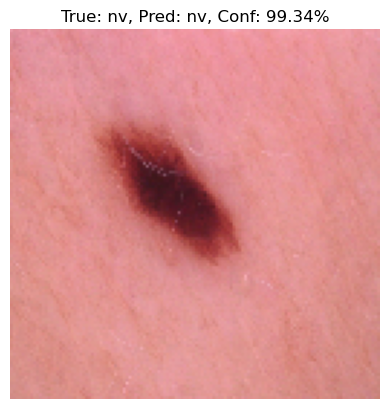

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


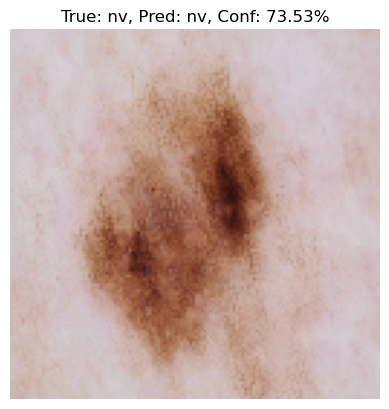

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


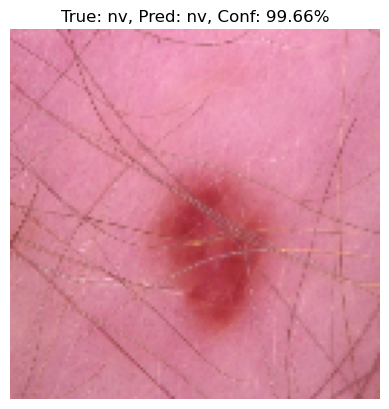

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


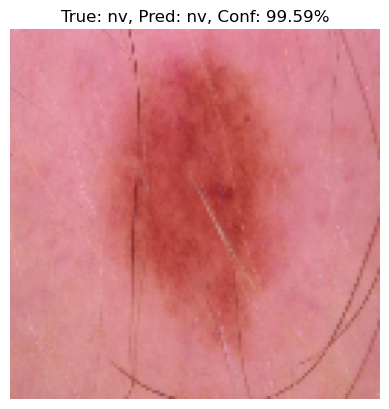

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


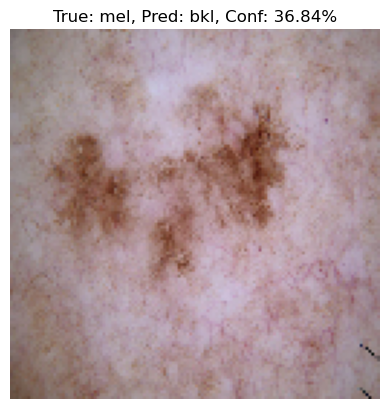

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


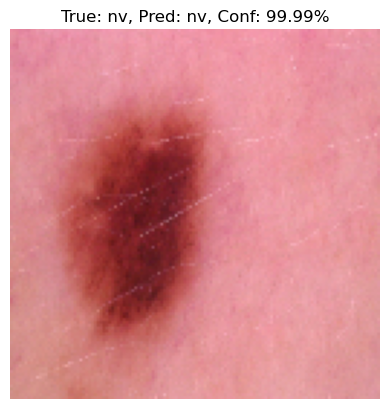

In [32]:
def plot_sample_predictions(model, X_val, y_val, label_mapping, num_samples=20):
    indices = np.random.choice(len(X_val), num_samples, replace=False)
    for idx in indices:
        img = X_val[idx]
        true_label = np.argmax(y_val[idx])
        true_class = list(label_mapping.keys())[list(label_mapping.values()).index(true_label)]
        
        img_expanded = np.expand_dims(img, axis=0)
        pred = model.predict(img_expanded)
        pred_class_idx = np.argmax(pred)
        pred_class = list(label_mapping.keys())[list(label_mapping.values()).index(pred_class_idx)]
        confidence = pred[0][pred_class_idx] * 100
        
        plt.figure()
        plt.imshow(img)
        plt.title(f"True: {true_class}, Pred: {pred_class}, Conf: {confidence:.2f}%")
        plt.axis('off')
        plt.show()

# Example usage
plot_sample_predictions(model, X_val, y_val, label_mapping, num_samples=20)

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)


In [34]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load pre-trained EfficientNetB0 model + higher level layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Epoch 1/50


D:\anaconda-install\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.6660 - loss: 1.1919
Epoch 1: val_loss improved from inf to 1.17289, saving model to best_model.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 138s 482ms/step - accuracy: 0.6660 - loss: 1.1918 - val_accuracy: 0.6585 - val_loss: 1.1729 - learning_rate: 0.0010
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.6748 - loss: 1.1567
Epoch 2: val_loss did not improve from 1.17289
251/251 ━━━━━━━━━━━━━━━━━━━━ 111s 439ms/step - accuracy: 0.6748 - loss: 1.1567 - val_accuracy: 0.6585 - val_loss: 1.1742 - learning_rate: 0.0010
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.6723 - loss: 1.1487
Epoch 3: val_loss improved from 1.17289 to 1.16176, saving model to best_model.keras
251/251 ━━━━━━━━━━━━━━━━━━━━ 106s 419ms/step - accuracy: 0.6723 - loss: 1.1488 - val_accuracy: 0.6585 - val_loss: 1.1618 - learning_rate: 0.0010
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.6779 - loss: 1.1369
Epoch 4: va

In [37]:
model.load_weights('best_model.keras')

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.6367 - loss: 1.1886
Validation Accuracy: 65.85%
